## ***Housing Price Prediction***

### **Overview**

This Project Notebook covers all the necessary steps to complete the Machine Learning Task of Predicting the Housing Prices on California Housing Dataset available on scikit-learn.

---

We will perform the following steps for successfully creating a model for house price prediction:


---

[**1. Data Extraction**](#scrollTo=nlL0k3pO4XM9&line=1&uniqifier=1)


* [Import libraries](#scrollTo=hJb_1cMg5eCo&line=1&uniqifier=1ps://)
* [Import Dataset from scikit-learn](#scrollTo=kzexflx_6QUw&line=2&uniqifier=1)
* [Understanding the given Description of Data and the problem Statement](#scrollTo=7cnoPXyS61jG&line=2&uniqifier=1)
* [Take a look at different Inputs and details available with dataset](#scrollTo=nNt1_Vt1_RnY&line=2&uniqifier=1)
* [Storing the obtained dataset into a Pandas Dataframe](#scrollTo=bGtCEhK3FIZ1&line=3&uniqifier=1)


---


[**2. EDA (Exploratory Data Analysis) and Visualization**](#scrollTo=m2U76ywm_cdR)

* [Getting a closer Look at obtained Data](#scrollTo=Dq6Y5BRwAsEN)
* [Exploring different Statistics of the Data (Summary and Distributions)](#scrollTo=1pjIo1PMD9tn)
* [Looking at Correlations (between indiviual features and between Input features and Target)](#scrollTo=gnD75sLQODpj)
* [Geospacial Data / Coordinates - Longitude and Lattitude features](#scrollTo=41bF5kcXaV4f)

---

**3. Preprocessing**
* Dealing with Duplicate and Null (NaN) values
* Dealing with Outlier values
* Data Normalization (Plots and Tests)
* Feature Scaling (Feature Transformation)
* Feature Engineering (Feature Design)


---


**4. Modeling**

* Specifying Evaluation Metrics such as MAE, MSE, RMSE, R squared and adjusted R square (using Cross-Validation and train test split)
* Base Line Models - trying multiple hyperparameters and models such as:
    * Linear Regression
    * Ridge Regression
    * Decision Trees Regressor
    * Random Forests Regressor
    * Gradient Boosted Regressor
    * XGBoost Regressor
    * Support Vector Regressor
* Model Selection (by comparing evaluation metrics)
* Prediction

---

**5. Gaining Insights about the Model**

* Learn Feature Importance and Relations with Prediction

---

**6. Deployment**

* Exporting the trained model to be used for later predictions. (by storing model object as byte file)

### **1. Data Extraction**

##### **Importing all Libraries needed for extracting and representing (visualizing) data** 

In [1]:
#IMPORTING LIBRARIES

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

---

##### **Importing / Loading the California Housing Price Data from scikit-learn (sklearn)**

using the parameter as_frame = True, returns the data in the form of Pandas Dataframe

In [2]:
#IMPORTING DATA

from sklearn.datasets import fetch_california_housing  
cal_housing_dataset = fetch_california_housing(as_frame = True)

---

##### **Understanding the given Description of Data and the problem Statement.**


Using sklearn to import a dataset we obtain a Bunch object which is similar to a dictonary which contains information about the dataset and the actual data that we can use

> we can access the available keys in the Bunch Object using keys() function


In [3]:
#LIST OF KEYS AVAILABLE WITH DATASET BUNCH OBJECT

cal_housing_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

We have the following keys available in the Bunch (data) obtained from sklearn 

*   data - It contains data rows, each row corresponding to the 8 input feature values.
*   target - It contains target data rows, each value corresponds to the average house value in units of 100,000 US Dollars.
*   frame - Only present when as_frame = True. Pandas DataFrame with data and target.
*   target_names - Name of the target feature.
*   feature_names - Array of ordered feature names used in the dataset.
*   DESCR - Description of the California housing dataset. This is important to understand the meaning of features that will be used to predict the housing Prices.



---

##### **Take a look at different Inputs and details available with dataset**

We can take a look at the information avaliable in the DESCR key to get a understanding of the data such as what is shape of our dataset and learn what are different features available that we can use for predicting house prices.

In [4]:
#DESCRIPTION OF DATASET

print(cal_housing_dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

Using the dataset description above we can see that we have 20640 housing data points (records) and each of the housing record contains information about the houses of the block in the form of 8 input features: 

* MedInc,  HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude and Longitude

This information about the block in which house is located can be used to create a model that can predict what should be the price of a new house with different set of characteristics. 

We can also seperatly get a list of all the input features and the target feature available.

In [5]:
#PREDICTIVE (INPUT) FEATURES AVAILABLE 

print(cal_housing_dataset.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [6]:
#TARGET (OUTPUT) FEATURE

print(cal_housing_dataset.target_names)

['MedHouseVal']


the data key of the 'Bunch' object contains the input feature data values for the housing records.

In [7]:
#DATA AVAILABLE CORRESPONDING TO INPUT FEATURES FOR EACH HOUSING RECORD

print(cal_housing_dataset.data)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

We also have the coorsponding housing price for each of the records.

In [8]:
#RESULTING TARGET / OUTPUT FEATURE VALUES AVAILABLE

print(cal_housing_dataset.target)

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64


We can see the complete dataset (input features and targets) using the frame key of our dataset object which stores the complete housing dataset (all records and features) as a Pandas DataFrame because we imported our data using the parameter as_frame = True.

In [9]:
#THE COMPLETE DATASET AVAILABLE FOR USE 

cal_housing_dataset.frame

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


---

##### **We can store our cal_housing_dataset.frame in a seperate new pandas variable (as a DataFrame) for easy reference later on.**

In [10]:
#STORING THE HOUSING DATA IN A SEPERATE PANDAS DATAFRAME VARIABLE

dataset = cal_housing_dataset.frame

We can view the top 5 rows of the dataset using .head() method of dataframe.

In [11]:
#VIEW TOP 5 ROWS OF DATASET

dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### **2. EDA (Exploratory Data Analysis) and Visualization**

Before working with any kind of data it is important to understand it. A crucial step to achive this is the Exploratory Data Analysis (EDA): a combination of visualizations and statistical analysis (univariate, bivariate and multivariate) that helps us to better understand the data we are working with and to gain insight into their relationships. 

So, let's explore our target variable and how the other features influence it.

---
##### **Taking a closer Look at obtained Data**

we can see the the overall details and information about the dataset obtained and individual feature columns using the pandas functions: 
* info() - to give a overview of type of data available.
* describe() - to get a statistical summary of available features.

In [12]:
#USING info() TO GET OVERVIEW OF INFORMATION / STRUCTURE OF FEATURE DATA 

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


From the quick summary (overview) of dataset above - we can see that all of our features are numerical (real / floating) type and none of the features have any missing values in dataset.

---
##### **Exploring different Statistics of the Data (Summary and Distributions)**

Among our features we also have Latitude and Longitude (Geospacial features - coordinates) which we can try to specially analyse later.

So, right now we will focus on the rest of the features.

In [49]:
#LIST OF FEATURES IN DATASET EXCLUDING Lattitude AND Longitude

features_for_EDA = ["MedInc", "HouseAge", "AveRooms", "AveBedrms", "Population", "AveOccup", "MedHouseVal"]

In [50]:
#SUMMARIZING STATISTICS OF THE DATASET

dataset[features_for_EDA].describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,5.000010


The above statistical summary of dataset gives us insights about the distribution of individual features (how feature values vary in the dataset) 

**We can better understand the feature distributions using graphs / plots**. 

Visualizing the data distribution of the features.

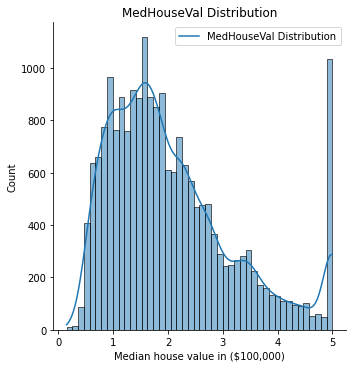

In [42]:
#CREATING A DISTRIBUTION PLOT FOR TARGET FEATURE

sns.displot(dataset['MedHouseVal'], kde = True)

plt.title('MedHouseVal Distribution')
plt.xlabel("Median house value in ($100,000)")
plt.legend(['MedHouseVal Distribution'], loc = 'best')
plt.show()

We can clearly see how the distribution does not seem to be normal, but highly right-skewed. If we use Models like Linear Regressor to make learn for skewed data and then make predictions it will not be able to capture the correct relations in data to make accurate predicions.

Despite that, let's leave it like that for now, we'll deal with that later in the notebook.

We can also take a breif look at the distribution of Input features avaiable using plots.

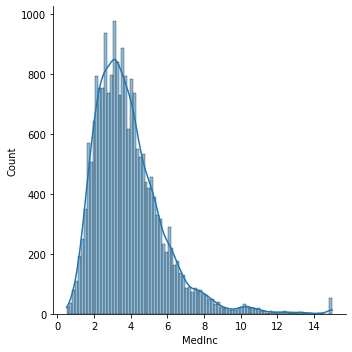

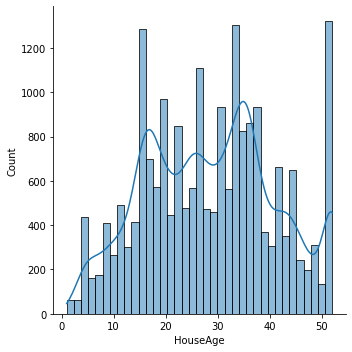

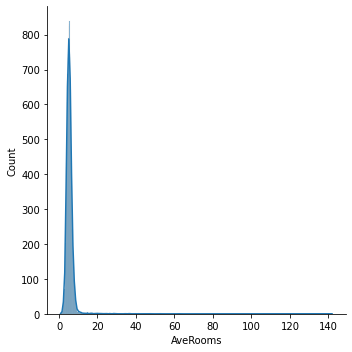

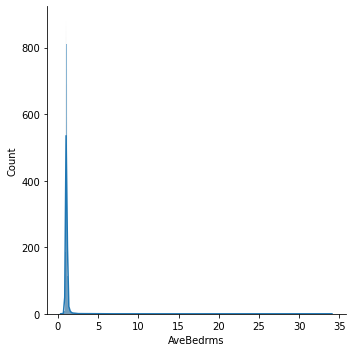

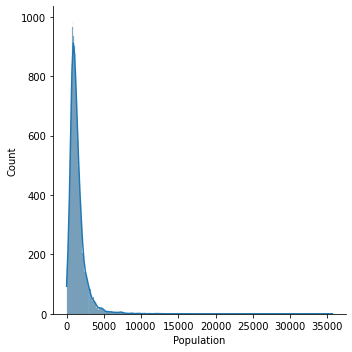

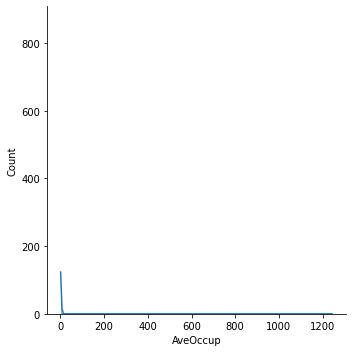

In [53]:
#VISUALIZING THE DISTRIBUTION IN SELECTED FEATURES EXLUDING MedHouseValues

for feature in features_for_EDA[:-1]:
    sns.displot(dataset[feature], kde = True)

As we can see from the plots above most of the input features (except HouseAge) also contain highly skewed data, which can affect our models performance as it might focus too much on the outlier values and might not be able to learn the general relation and patterns in data.

So, We can try to deal with them and make our data distribution closer to normal distribution which can help in some cases to make more accurate predictions (and also generalize better).

--- 
##### **Looking at Correlations (between indiviual features and between Input features and Target)**

The correlation matrix is the best way to see all the numerical correlation between features. Let's see which are the feature that correlate most with our target variable.

We can also check to see the correlations between the features (if two features are highly corelated we can just use one of them to convey the information needed and we can remove another - feature selection)

We can use the corr() function of Pandas dataframe which returns the Pearson correlation between columns (features) by default.

In [54]:
#corr() - CORRELATION BETWEEN COLUMNS (FEATURES) - DEFAULT = PEARSON'S COEFFICIENT
#CORRELATION MATRIX

dataset[features_for_EDA].corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,-0.023737
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,1.000000


Above we get the correlation matrix between features which tells the corration using pearson's coefficient.

We can better understand this using heatmap visualization.

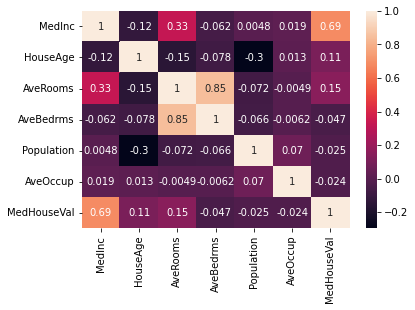

In [56]:
#HEATMAP TO VISUALIZE CORRELATION MATRIX

sns.heatmap(dataset[features_for_EDA].corr(), annot = True)

Now that we know which feature (MedInc) correlates most with our target variable we can investigate it more in depth.

Text(0, 0.5, 'MedHouseVal')

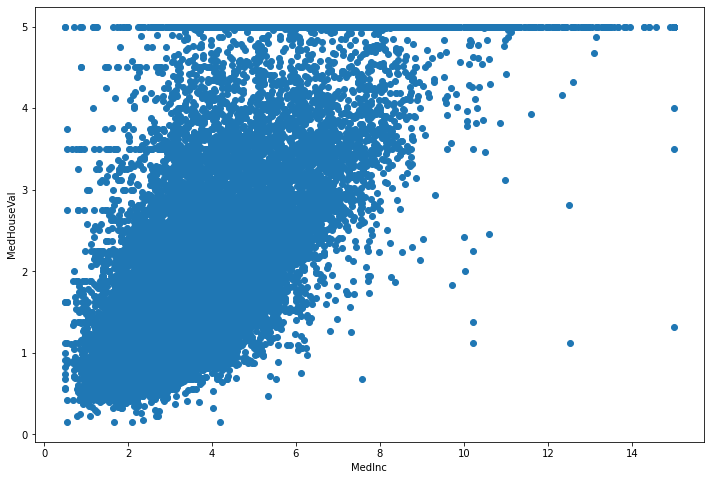

In [62]:
#MedInc - MedHouseVal [Pearson = 0.69]

plt.figure(figsize=(12, 8))

plt.scatter(data = dataset, x = "MedInc", y = "MedHouseVal")
plt.xlabel("MedInc")
plt.ylabel("MedHouseVal")

(There exists a positive correlation) - The general pattern that we can see is that as the median income in block group (MedInc) increases the Median Price of house (MedHouseVal) increases.

---
##### **Geospacial Data (Coordinates) - Longitude and Lattitude features**

Now we can also take a look at how **Geospacial Data (coordinates) features (Longitude and Lattitude)** can help us predict the Housing prices.


Text(0.5, 1.0, 'Median house value depending on\n the spatial location')

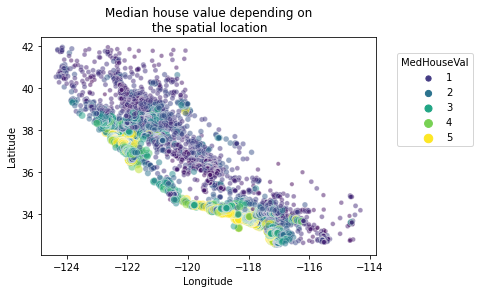

In [66]:
sns.scatterplot(data = dataset, x = "Longitude", y = "Latitude", size = "MedHouseVal", hue = "MedHouseVal", palette = "viridis", alpha=0.5)

plt.legend(title = "MedHouseVal", bbox_to_anchor = (1.05, 0.95), loc = "upper left")

plt.title("Median house value depending on\n the spatial location")

From the map above, We can see that the location of the House also gives us useful insight as to what could be the Median price of House, Houses of similar price ranges for clusters together on the map and we can use this to get an estimate price based on location.